In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
encodings_to_try = ['utf-8-sig', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("C:/Users/15694/Desktop/Cross selling/code/Michelle/variable_without_pca2.csv", encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

In [4]:
df.head()

,SIX_MONTH_BAL_OS_SAVINGS,SIX_MONTH_BAL_OS_CURRENT,SIX_MONTH_BAL_OS_FD,SIX_MONTH_BAL_OS_LEASING,SIX_MONTH_BAL_OS_CARD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,NO_OF_ASSERT_ACCOUNTS,NO_OF_LIABILITY_ACCOUNTS,CR_DR_Usage,NPA_FLAG,LOAN_CAT1
0,0.042612,-0.048785,-0.053259,-0.134894,-0.155864,-0.075719,-0.062581,-0.023629,-0.044929,-0.056843,-0.003142,0.397017,1.805905,0.051895,0,3
1,-0.091396,-0.048785,0.066148,-0.134894,-0.297359,-0.075719,-0.050164,-0.023629,-0.044929,-0.056843,-0.010305,-0.623858,0.600067,-0.067204,0,3
2,-0.076329,-0.048785,0.031772,-0.134894,1.262271,-0.059430,-0.065534,-0.023629,-0.044929,-0.056843,-0.006337,1.417891,1.805905,-0.023470,0,0
3,-0.101346,-0.048785,0.308069,-0.134894,-0.297359,-0.075719,-0.010893,-0.023629,-0.044929,-0.056843,0.017446,-0.623858,0.198120,-0.067204,0,3
4,-0.013879,-0.048785,-0.071656,-0.134894,-0.297359,-0.075719,-0.053618,-0.023629,-0.044929,-0.056843,-0.004448,-0.623858,-0.203826,-0.067204,1,4


In [5]:
df.columns

Index(['SIX_MONTH_BAL_OS_SAVINGS', 'SIX_MONTH_BAL_OS_CURRENT',
       'SIX_MONTH_BAL_OS_FD', 'SIX_MONTH_BAL_OS_LEASING',
       'SIX_MONTH_BAL_OS_CARD', 'SIX_MONTH_BAL_OS_OD', 'TOTAL_AVG_BAL',
       'FD_AMOUNT_UNDER_LIEN', 'CURRENT_AMOUNT_UNDER_LIEN',
       'SAVINGS_AMOUNT_UNDER_LIEN', 'CUSTOMER_PROFITABILITY',
       'NO_OF_ASSERT_ACCOUNTS', 'NO_OF_LIABILITY_ACCOUNTS', 'CR_DR_Usage',
       'NPA_FLAG', 'LOAN_CAT1'],
      dtype='object')

In [6]:
df.shape

(11836, 16)

In [7]:
df.isna().sum()

SIX_MONTH_BAL_OS_SAVINGS     0
SIX_MONTH_BAL_OS_CURRENT     0
SIX_MONTH_BAL_OS_FD          0
SIX_MONTH_BAL_OS_LEASING     0
SIX_MONTH_BAL_OS_CARD        0
SIX_MONTH_BAL_OS_OD          0
TOTAL_AVG_BAL                0
FD_AMOUNT_UNDER_LIEN         0
CURRENT_AMOUNT_UNDER_LIEN    0
SAVINGS_AMOUNT_UNDER_LIEN    0
CUSTOMER_PROFITABILITY       0
NO_OF_ASSERT_ACCOUNTS        0
NO_OF_LIABILITY_ACCOUNTS     0
CR_DR_Usage                  0
NPA_FLAG                     0
LOAN_CAT1                    0
dtype: int64

In [8]:
X = df.drop(columns=["LOAN_CAT1"])
Y = df["LOAN_CAT1"]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,  classification_report, confusion_matrix


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [11]:
y_train.value_counts()

3    3221
1    2006
2    1246
5     831
4     796
0     185
Name: LOAN_CAT1, dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTE()
X_sm, Y_sm=sm.fit_resample(X_train,y_train)
print('Dataset after resampling:')
print(sorted(Counter(Y_sm).items()))

Dataset after resampling:
[(0, 3221), (1, 3221), (2, 3221), (3, 3221), (4, 3221), (5, 3221)]


In [13]:
import xgboost as xgb
xg_boost=xgb.XGBClassifier()
xg_boost.fit(X_sm, Y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = xg_boost.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\n Test Classification Report:\n", classification_rep)

Accuracy Score: 0.6741762883694734
Precision (Macro): 0.5984281422214351
Recall (Macro): 0.6420866024998336
F1 Score (Macro): 0.6108036722979271
Confusion Matrix:
[[ 39  22   8   2   0   2]
 [ 90 554 138  60   5   0]
 [ 12 124 319 109   7   4]
 [  9  48 146 976 126  22]
 [  1   1   8  81 199  48]
 [  0   0   1  15  68 307]]

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.53      0.35        73
           1       0.74      0.65      0.69       847
           2       0.51      0.55      0.53       575
           3       0.79      0.74      0.76      1327
           4       0.49      0.59      0.54       338
           5       0.80      0.79      0.79       391

    accuracy                           0.67      3551
   macro avg       0.60      0.64      0.61      3551
weighted avg       0.69      0.67      0.68      3551



In [15]:
y_pred_train_XG = xg_boost.predict(X_sm)

In [16]:
acc = accuracy_score(Y_sm, y_pred_train_XG)
prec_macro = precision_score(Y_sm, y_pred_train_XG, average='macro')
recall_macro = recall_score(Y_sm, y_pred_train_XG, average='macro')
f1_macro = f1_score(Y_sm, y_pred_train_XG, average='macro')
classification_rep = classification_report(Y_sm,y_pred_train_XG)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_XG = confusion_matrix(Y_sm, y_pred_train_XG)
print("Confusion Matrix:")
print(cf_matrix_XG )
print("\n Train Classification Report:\n", classification_rep)

Accuracy Score: 0.9476353099451517
Precision (Macro): 0.9479234058837879
Recall (Macro): 0.9476353099451517
F1 Score (Macro): 0.9475328028066983
Confusion Matrix:
[[3205   14    1    1    0    0]
 [ 105 2916  164   33    3    0]
 [   5  185 2969   60    2    0]
 [   4   32  225 2884   71    5]
 [   0    0    1   64 3148    8]
 [   0    0    0    5   24 3192]]

 Train Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3221
           1       0.93      0.91      0.92      3221
           2       0.88      0.92      0.90      3221
           3       0.95      0.90      0.92      3221
           4       0.97      0.98      0.97      3221
           5       1.00      0.99      0.99      3221

    accuracy                           0.95     19326
   macro avg       0.95      0.95      0.95     19326
weighted avg       0.95      0.95      0.95     19326



In [17]:
# find important features

In [18]:
importances=xg_boost.feature_importances_

In [19]:
indices=importances.argsort()[::-1]

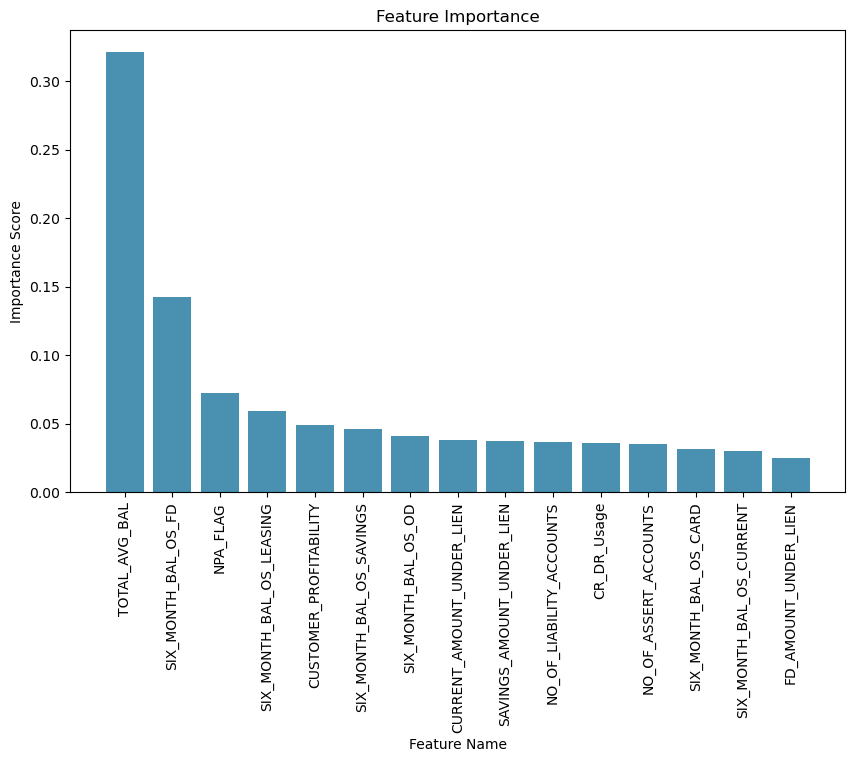

In [20]:
# Plot important Features
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(len(indices)),importances[indices],align="center",color='#4990b1')
plt.xticks(range(len(indices)),X.columns[indices],rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()

In [21]:
#get top 80%  features
total_features=len(indices)
threshold=0.8
cum_importance=np.cumsum(importances[indices])
selected_index=np.argmax(cum_importance>threshold*cum_importance[-1])

selected_features=X.columns[indices[:selected_index+1]]
selected_scores=importances[indices[:selected_index+1]]

print("Top 80% important features:")
for feature,score in zip(selected_features,selected_scores):
    print(f"Feature :{feature}: Importance Score ={score:.4f}")

Top 80% important features:
Feature :TOTAL_AVG_BAL: Importance Score =0.3211
Feature :SIX_MONTH_BAL_OS_FD: Importance Score =0.1425
Feature :NPA_FLAG: Importance Score =0.0724
Feature :SIX_MONTH_BAL_OS_LEASING: Importance Score =0.0593
Feature :CUSTOMER_PROFITABILITY: Importance Score =0.0488
Feature :SIX_MONTH_BAL_OS_SAVINGS: Importance Score =0.0458
Feature :SIX_MONTH_BAL_OS_OD: Importance Score =0.0409
Feature :CURRENT_AMOUNT_UNDER_LIEN: Importance Score =0.0383
Feature :SAVINGS_AMOUNT_UNDER_LIEN: Importance Score =0.0373


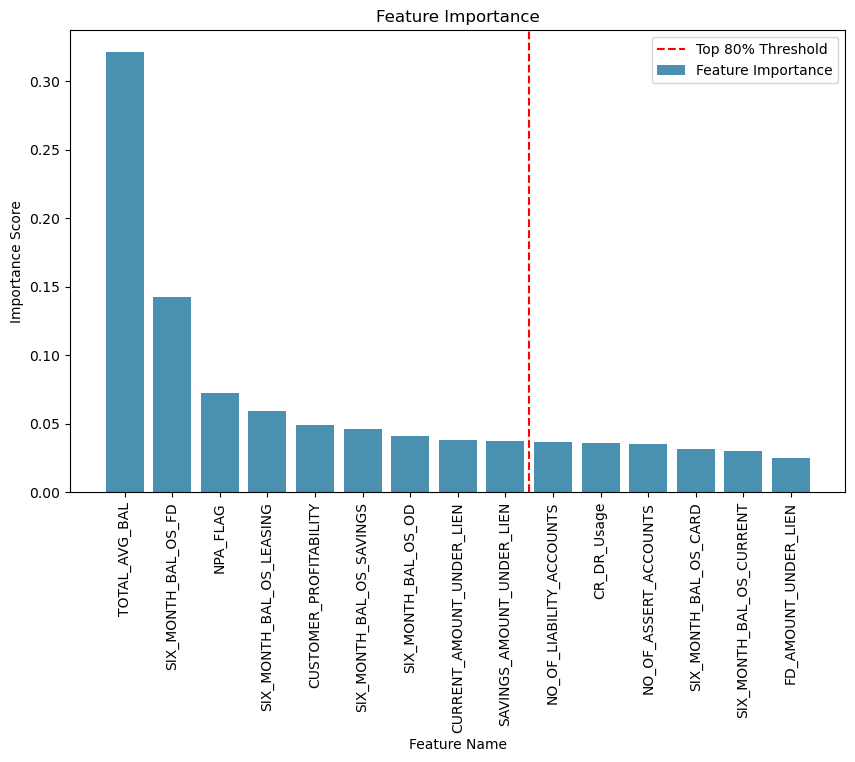

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'importances' is a numpy array containing feature importances
cumulative_importances = np.cumsum(importances[indices])

# Find the index where cumulative importance crosses 80%
threshold_index = np.argmax(cumulative_importances >= 0.8 * cumulative_importances[-1])

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(indices)), importances[indices], align="center", color='#4990b1', label='Feature Importance')
plt.axvline(x=threshold_index + 0.5, color='red', linestyle='--', label='Top 80% Threshold')
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import roc_curve,auc
y_prob1=xg_boost.predict_proba(X_test)

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob1,multi_class='ovr')

0.913494552234145